# 计算新闻传播学
## 邹烨 15210130105
### 第三次作业：机器学习

# 使用sklearn做线性回归

In [33]:
%matplotlib inline

from sklearn import datasets
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale

import sklearn
print sklearn.__version__

0.17.1


In [34]:
boston = datasets.load_boston()
y = boston.target
X = boston.data

In [35]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = smf.ols('boston.target ~ boston.data', data=boston).fit()

print results.summary()

                            OLS Regression Results                            
Dep. Variable:          boston.target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 15 May 2016   Prob (F-statistic):          6.95e-135
Time:                        16:34:13   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          36.4911      5.104     

In [36]:
regr = linear_model.LinearRegression()
lm = regr.fit(boston.data, y)

In [37]:
lm.intercept_, lm.coef_, lm.score(boston.data, y)

(36.491103280361237,
 array([ -1.07170557e-01,   4.63952195e-02,   2.08602395e-02,
          2.68856140e+00,  -1.77957587e+01,   3.80475246e+00,
          7.51061703e-04,  -1.47575880e+00,   3.05655038e-01,
         -1.23293463e-02,  -9.53463555e-01,   9.39251272e-03,
         -5.25466633e-01]),
 0.74060774286494269)

In [38]:
predicted = regr.predict(boston.data)

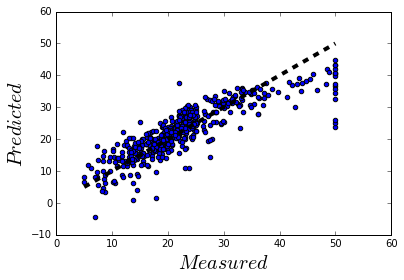

In [41]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('$Measured$', fontsize = 20)
ax.set_ylabel('$Predicted$', fontsize = 20)
plt.show()

# 训练集与测试集

In [42]:
boston.data

array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]])

In [44]:
from sklearn.cross_validation import train_test_split
Xs_train, Xs_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=42)

In [48]:
regr = linear_model.LinearRegression()
lm = regr.fit(Xs_train, y_train)

In [49]:
lm.intercept_, lm.coef_, lm.score(Xs_train, y_train)

(30.288948339368815,
 array([ -1.12463481e-01,   3.00810168e-02,   4.07309919e-02,
          2.78676719e+00,  -1.72406347e+01,   4.43248784e+00,
         -6.23998173e-03,  -1.44848504e+00,   2.62113793e-01,
         -1.06390978e-02,  -9.16398679e-01,   1.24516469e-02,
         -5.09349120e-01]),
 0.75088377867329137)

In [50]:
predicted = regr.predict(Xs_test)

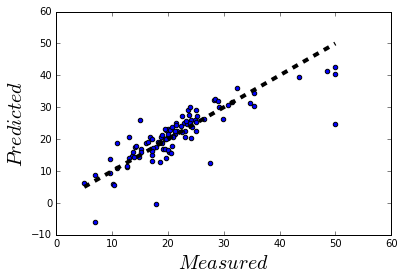

In [52]:
fig, ax = plt.subplots()
ax.scatter(y_test, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('$Measured$', fontsize = 20)
ax.set_ylabel('$Predicted$', fontsize = 20)
plt.show()

# 交叉验证

In [56]:
from sklearn.cross_validation import cross_val_score

regr = linear_model.LinearRegression()
scores = cross_val_score(regr, boston.data , boston.target, cv = 3)
scores.mean()  

-1.5787701857181775

In [58]:
data_X_scale = scale(boston.data)
scores = cross_val_score(regr, boston.data, boston.target, cv = 7)
scores.mean()  

0.45384871359695766

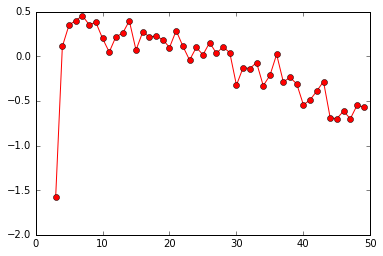

In [59]:
scores = [cross_val_score(regr, data_X_scale, boston.target, cv = int(i)).mean() for i in range(3, 50)]
plt.plot(range(3, 50), scores,'r-o')
plt.show()

# 使用天涯有关雷洋的数据

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt

In [81]:
import pandas as pd

In [62]:
df = pd.read_csv('/Users/zouye/Desktop/githb/tianya_bbs_leiyang_list.txt', sep = "\t", header=None)
df[:2]

,0,1,2,3,4,5,6
0,"雷洋是否嫖娼,从百度地图上一看就一清二楚了.",/post-free-5460564-1.shtml,艹翻美帝,http://www.tianya.cn/112033042,139365,1622,2016-05-10 23:02
1,"【风青杨专栏】 对不起,我并不想知道雷洋如何嫖娼",/post-free-5462140-1.shtml,正风青杨,http://www.tianya.cn/62863249,110709,1904,2016-05-12 08:49


In [63]:
df=df.rename(columns = {0:'title', 1:'link', 2:'author',3:'author_page', 4:'click', 5:'reply', 6:'time'})
df[:5]

,title,link,author,author_page,click,reply,time
0,"雷洋是否嫖娼,从百度地图上一看就一清二楚了.",/post-free-5460564-1.shtml,艹翻美帝,http://www.tianya.cn/112033042,139365,1622,2016-05-10 23:02
1,"【风青杨专栏】 对不起,我并不想知道雷洋如何嫖娼",/post-free-5462140-1.shtml,正风青杨,http://www.tianya.cn/62863249,110709,1904,2016-05-12 08:49
2,雷洋涉嫌嫖娼致死之合理推理,/post-free-5460335-1.shtml,鲁直,http://www.tianya.cn/819155,81058,1987,2016-05-10 19:12
3,参加调查常州外语学院毒地的环保专家雷洋和死的雷洋是一个人...,/post-free-5461500-1.shtml,娑罗室伐底,http://www.tianya.cn/56694133,40447,370,2016-05-11 19:01
4,"雷洋尸检报告未出,但问题已显现:",/post-free-5463133-1.shtml,ybb101101,http://www.tianya.cn/112360561,38481,623,2016-05-12 21:44


In [64]:
da = pd.read_csv('/Users/zouye/Desktop/githb/tianya_bbs_leiyang_author_info.txt', sep = "\t", header=None)
da[:2]

,0,1,2,3,4
0,http://www.tianya.cn/112033042,0,1,8,28
1,http://www.tianya.cn/62863249,20,8233,724,59


In [65]:
da=da.rename(columns = {0:'author_page', 1:'followed_num', 2:'fans_num',3:'post_num', 4:'comment_num'})
da[:5]

,author_page,followed_num,fans_num,post_num,comment_num
0,http://www.tianya.cn/112033042,0,1,8,28
1,http://www.tianya.cn/62863249,20,8233,724,59
2,http://www.tianya.cn/819155,61,1455,2124,2525
3,http://www.tianya.cn/56694133,0,54,58,2858
4,http://www.tianya.cn/112360561,5,2,2,12


In [67]:
data = pd.concat([df,da], axis=1)
len(data)

135

In [11]:
data[:3]

,title,link,author,author_page,click,reply,time,author_page,followed_num,fans_num,post_num,comment_num
0,"雷洋是否嫖娼,从百度地图上一看就一清二楚了.",/post-free-5460564-1.shtml,艹翻美帝,http://www.tianya.cn/112033042,139365,1622,2016-05-10 23:02,http://www.tianya.cn/112033042,0,1,8,28
1,"【风青杨专栏】 对不起,我并不想知道雷洋如何嫖娼",/post-free-5462140-1.shtml,正风青杨,http://www.tianya.cn/62863249,110709,1904,2016-05-12 08:49,http://www.tianya.cn/62863249,20,8233,724,59
2,雷洋涉嫌嫖娼致死之合理推理,/post-free-5460335-1.shtml,鲁直,http://www.tianya.cn/819155,81058,1987,2016-05-10 19:12,http://www.tianya.cn/819155,61,1455,2124,2525


In [68]:
import numpy as np

In [69]:
type(data.time[0])

str

In [70]:
date = map(lambda x: x[:10], data.time)
data['date'] = pd.to_datetime(date)

In [71]:
data.time = pd.to_datetime(data.time)
data['month'] = data.time.dt.month
data['year'] = data.time.dt.year
data['day'] = data.time.dt.day
type(data.time[0])

pandas.tslib.Timestamp

In [72]:
data[:3]


,title,link,author,author_page,click,reply,time,author_page,followed_num,fans_num,post_num,comment_num,date,month,year,day
0,"雷洋是否嫖娼,从百度地图上一看就一清二楚了.",/post-free-5460564-1.shtml,艹翻美帝,http://www.tianya.cn/112033042,139365,1622,2016-05-10 23:02:00,http://www.tianya.cn/112033042,0,1,8,28,2016-05-10,5,2016,10
1,"【风青杨专栏】 对不起,我并不想知道雷洋如何嫖娼",/post-free-5462140-1.shtml,正风青杨,http://www.tianya.cn/62863249,110709,1904,2016-05-12 08:49:00,http://www.tianya.cn/62863249,20,8233,724,59,2016-05-12,5,2016,12
2,雷洋涉嫌嫖娼致死之合理推理,/post-free-5460335-1.shtml,鲁直,http://www.tianya.cn/819155,81058,1987,2016-05-10 19:12:00,http://www.tianya.cn/819155,61,1455,2124,2525,2016-05-10,5,2016,10


In [73]:
import statsmodels.api as sm

In [74]:
data.describe()

,click,reply,followed_num,fans_num,post_num,comment_num,month,year,day
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.0,135.0,135.000000
mean,5162.481481,90.014815,27.192593,703.229630,569.681481,1589.259259,5.0,2016.0,12.259259
std,17710.075043,289.355485,167.295498,3432.839252,1907.348181,4773.612626,0.0,0.0,1.203000
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.0,2016.0,10.000000
25%,269.500000,2.000000,0.000000,2.000000,3.000000,23.000000,5.0,2016.0,11.000000
50%,621.000000,13.000000,1.000000,11.000000,23.000000,153.000000,5.0,2016.0,12.000000
75%,2179.500000,45.000000,5.000000,38.000000,302.500000,972.000000,5.0,2016.0,13.000000
max,139365.000000,1987.000000,1817.000000,33271.000000,16253.000000,36705.000000,5.0,2016.0,14.000000


In [75]:
def transformData(dat):
    results = []
    for i in dat:
        if i != 'na':
            results.append( int(i))
        else:
            results.append(0)
    return results

In [76]:
data.fans_num = transformData(data.fans_num)
data.followed_num = transformData(data.followed_num )
data.post_num = transformData(data.post_num )
data.comment_num = transformData(data.comment_num )

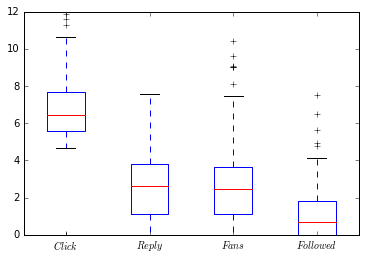

In [77]:
plt.boxplot([np.log(data.click+1), np.log(data.reply+1), 
             np.log(data.fans_num+1), np.log(data.followed_num + 1)], 
            labels = ['$Click$', '$Reply$', '$Fans$', '$Followed$'])
plt.show()

In [83]:
def randomSplit(dataX, dataY, num):
    dataX_train = []
    dataX_test = []
    dataY_train = []
    dataY_test = []
    import random
    test_index = random.sample(range(len(df)), num)
    for k in range(len(dataX)):
        if k in test_index:
            dataX_test.append([dataX[k]])
            dataY_test.append(dataY[k])
        else:
            dataX_train.append([dataX[k]])
            dataY_train.append(dataY[k])
    return dataX_train, dataX_test, dataY_train, dataY_test, 

In [84]:
import numpy as np

data_X = df.reply
data_X_train, data_X_test, data_y_train, data_y_test = randomSplit(np.log(df.click+1), np.log(df.reply+1), 20)
regr = linear_model.LinearRegression()
regr.fit(data_X_train, data_y_train)
print'Variance score: %.2f' % regr.score(data_X_test, data_y_test)

Variance score: 0.78


In [85]:
y_true, y_pred = data_y_test, regr.predict(data_X_test)

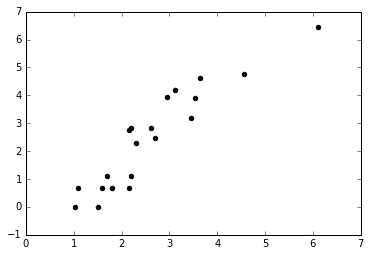

In [86]:
plt.scatter(y_pred, y_true,  color='black')
plt.show()

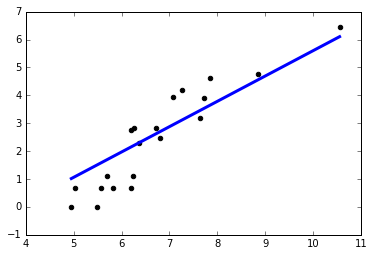

In [87]:
plt.scatter(data_X_test, data_y_test,  color='black')
plt.plot(data_X_test, regr.predict(data_X_test), color='blue', linewidth=3)
plt.show()

In [88]:
print "Residual sum of squares: %.2f" % np.mean((regr.predict(data_X_test) - data_y_test) ** 2)

Residual sum of squares: 0.68


In [89]:
df.click_log = [[df.click[i]] for i in range(len(df))]
df.reply_log = [[df.reply[i]] for i in range(len(df))]

In [90]:
from sklearn.cross_validation import train_test_split
Xs_train, Xs_test, y_train, y_test = train_test_split(df.click_log, df.reply_log,test_size=0.2, random_state=0)


regr = linear_model.LinearRegression()

regr.fit(Xs_train, y_train)

print'Variance score: %.2f' % regr.score(Xs_test, y_test)

Variance score: 0.55


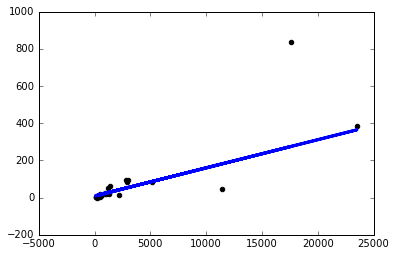

In [91]:
plt.scatter(Xs_test, y_test,  color='black')
plt.plot(Xs_test, regr.predict(Xs_test), color='blue', linewidth=3)
plt.show()

In [95]:
from sklearn.cross_validation import cross_val_score

regr = linear_model.LinearRegression()
scores = cross_val_score(regr, df.click_log, df.reply_log, cv = 3)
scores.mean()  

-31.479724274826093

In [93]:
regr = linear_model.LinearRegression()
scores = cross_val_score(regr, df.click_log, df.reply_log, cv = 4)
scores.mean()  

-40.548509800286581

# 使用sklearn做logistic回归

In [96]:
repost = []
for i in df.title:
    if u'转载' in i.decode('utf8'):
        repost.append(1)
    else:
        repost.append(0)

In [97]:
data_X = [[df.click[i], df.reply[i]] for i in range(len(df))]
data_X[:3]

[[139365, 1622], [110709, 1904], [81058, 1987]]

In [98]:
from sklearn.linear_model import LogisticRegression
df['repost'] = repost
model = LogisticRegression()
model.fit(data_X,df.repost)
model.score(data_X,df.repost)

0.96296296296296291

In [99]:
def randomSplitLogistic(dataX, dataY, num):
    dataX_train = []
    dataX_test = []
    dataY_train = []
    dataY_test = []
    import random
    test_index = random.sample(range(len(df)), num)
    for k in range(len(dataX)):
        if k in test_index:
            dataX_test.append(dataX[k])
            dataY_test.append(dataY[k])
        else:
            dataX_train.append(dataX[k])
            dataY_train.append(dataY[k])
    return dataX_train, dataX_test, dataY_train, dataY_test, 

In [100]:
data_X_train, data_X_test, data_y_train, data_y_test = randomSplitLogistic(data_X, df.repost, 20)
# Create logistic regression object
log_regr = LogisticRegression()
# Train the model using the training sets
log_regr.fit(data_X_train, data_y_train)
# Explained variance score: 1 is perfect prediction
print'Variance score: %.2f' % log_regr.score(data_X_test, data_y_test)

Variance score: 0.95


In [101]:
y_true, y_pred = data_y_test, log_regr.predict(data_X_test)

In [102]:
y_true, y_pred

([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [103]:
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97        19
          1       0.00      0.00      0.00         1

avg / total       0.90      0.95      0.93        20



//anaconda/envs/dato-env/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [104]:
from sklearn.cross_validation import train_test_split
Xs_train, Xs_test, y_train, y_test = train_test_split(data_X, df.repost, test_size=0.2, random_state=42)

In [106]:
# Create logistic regression object
log_regr = LogisticRegression()
# Train the model using the training sets
log_regr.fit(Xs_train, y_train)
# Explained variance score: 1 is perfect prediction
print'Variance score: %.2f' % log_regr.score(Xs_test, y_test)

Variance score: 1.00


In [107]:
print('Logistic score for test set: %f' % log_regr.score(Xs_test, y_test))
print('Logistic score for training set: %f' % log_regr.score(Xs_train, y_train))
y_true, y_pred = y_test, log_regr.predict(Xs_test)
print(classification_report(y_true, y_pred))

Logistic score for test set: 1.000000
Logistic score for training set: 0.953704
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        27

avg / total       1.00      1.00      1.00        27



In [108]:
logre = LogisticRegression()
scores = cross_val_score(logre, data_X, df.repost, cv = 3)
scores.mean()  

0.955870297174645

In [109]:
logre = LogisticRegression()
data_X_scale = scale(data_X)
# The importance of preprocessing in data science and the machine learning pipeline I: 
scores = cross_val_score(logre, data_X_scale, df.repost, cv = 3)
scores.mean()  

0.94137754355145675

# 使用sklearn实现贝叶斯预测

In [110]:
from sklearn import naive_bayes
'  '.join(dir(naive_bayes))

'ABCMeta  BaseDiscreteNB  BaseEstimator  BaseNB  BernoulliNB  ClassifierMixin  GaussianNB  LabelBinarizer  MultinomialNB  __all__  __builtins__  __doc__  __file__  __name__  __package__  _check_partial_fit_first_call  abstractmethod  binarize  check_X_y  check_array  check_is_fitted  in1d  issparse  label_binarize  logsumexp  np  safe_sparse_dot  six'

In [111]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

x= np.array([[-3,7],[1,5], [1,2], [-2,0], [2,3], [-4,0], [-1,1], [1,1], [-2,2], [2,7], [-4,1], [-2,7]])
Y = np.array([3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4])

In [112]:
model = GaussianNB()
model.fit(x[:8], Y[:8])


predicted= model.predict([[1,2],[3,4]])
print predicted

[4 3]


In [113]:
model.score(x[8:], Y[8:])

0.25

In [114]:
data_X_train, data_X_test, data_y_train, data_y_test = randomSplit(df.click, df.reply, 20)
 
model.fit(data_X_train, data_y_train)

 
predicted= model.predict(data_X_test)
print predicted

[52 52 52 52 52 52 23 45 15 13  4  4 21  1  1  2  2  2  0  0]


In [115]:
model.score(data_X_test, data_y_test)

0.050000000000000003

In [116]:
from sklearn.cross_validation import cross_val_score

model = GaussianNB()
scores = cross_val_score(model, [[c] for c in df.click], df.reply, cv = 5)
scores.mean()    

//anaconda/envs/dato-env/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


0.10261843867981975

# 使用sklearn实现决策树

In [117]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='gini')

In [118]:
data_X_train, data_X_test, data_y_train, data_y_test = randomSplitLogistic(data_X, df.repost, 20)
model.fit(data_X_train,data_y_train)
model.score(data_X_train,data_y_train)

1.0

In [119]:
model.predict(data_X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [121]:
scores = cross_val_score(model, data_X, df.repost, cv = 3)
scores.mean()   

0.60267896354852879

# 使用sklearn实现SVM支持向量机

In [123]:
from sklearn import svm
model=svm.SVC() 

In [124]:
data_X_train, data_X_test, data_y_train, data_y_test = randomSplitLogistic(data_X, df.repost, 20)
model.fit(data_X_train,data_y_train)
model.score(data_X_train,data_y_train)

0.99130434782608701

In [125]:
model.predict(data_X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [126]:
scores = []
cvs = [3, 5, 10, 25, 50, 75, 100]
for i in cvs:
    score = cross_val_score(model, data_X, df.repost, cv = i)
    scores.append(score.mean() )

//anaconda/envs/dato-env/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)
//anaconda/envs/dato-env/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=25.
  % (min_labels, self.n_folds)), Warning)
//anaconda/envs/dato-env/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=50.
  % (min_labels, self.n_folds)), Warning)
//anaconda/envs/dato-env/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 5 members, which is to

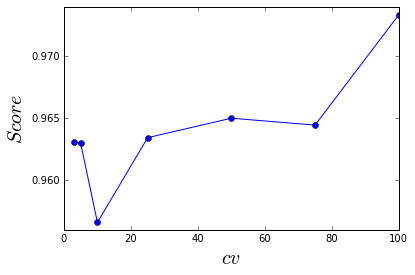

In [127]:
plt.plot(cvs, scores, 'b-o')
plt.xlabel('$cv$', fontsize = 20)
plt.ylabel('$Score$', fontsize = 20)
plt.show()

# 使用泰坦尼克号数据

In [128]:
import numpy as np
from sklearn import tree

In [129]:
import pandas as pd
train = pd.read_csv('/Users/zouye/cjc2016/data/tatanic_train.csv', sep = ",")

In [130]:
train.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [131]:
train["Age"] = train["Age"].fillna(train["Age"].median())
#Convert the male and female groups to integer form
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1

#Impute the Embarked variable
train["Embarked"] = train["Embarked"].fillna('S')
#Convert the Embarked classes to integer form
train["Embarked"][train["Embarked"] == "S"] = 0
train["Embarked"][train["Embarked"] == "C"] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2

/anaconda/envs/dato-env/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda/envs/dato-env/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/dato-env/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/dato-env/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarnin

In [132]:
target = train['Survived'].values
features_one = train[["Pclass", "Sex", "Age", "Fare"]].values

#Fit your first decision tree: my_tree_one
my_tree_one = tree.DecisionTreeClassifier()

my_tree_one = my_tree_one.fit(features_one, target)
#Look at the importance of the included features and print the score
print(my_tree_one.feature_importances_)
print(my_tree_one.score(features_one, target))

[ 0.1269655   0.31274009  0.24516131  0.3151331 ]
0.977553310887


In [134]:
test = pd.read_csv('/Users/zouye/cjc2016/data/tatanic_test.csv', sep = ",")
# Impute the missing value with the median
test.Fare[152] = test.Fare.median()
test["Age"] = test["Age"].fillna(test["Age"].median())
#Convert the male and female groups to integer form
test["Sex"][test["Sex"] == "male"] = 0
test["Sex"][test["Sex"] == "female"] = 1

#Impute the Embarked variable
test["Embarked"] = test["Embarked"].fillna('S')
#Convert the Embarked classes to integer form
test["Embarked"][test["Embarked"] == "S"] = 0
test["Embarked"][test["Embarked"] == "C"] = 1
test["Embarked"][test["Embarked"] == "Q"] = 2

# Extract the features from the test set: Pclass, Sex, Age, and Fare.
test_features = test[["Pclass","Sex", "Age", "Fare"]].values

# Make your prediction using the test set
my_prediction = my_tree_one.predict(test_features)

# Create a data frame with two columns: PassengerId & Survived. Survived contains your predictions
PassengerId =np.array(test['PassengerId']).astype(int)
my_solution = pd.DataFrame(my_prediction, PassengerId, columns = ["Survived"])

/anaconda/envs/dato-env/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda/envs/dato-env/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/dato-env/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/envs/dato-env/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarnin

In [135]:
print my_solution[:3]

     Survived
892         0
893         0
894         1


In [136]:
print my_solution.shape

(418, 1)


In [137]:
my_solution.to_csv("/Users/zouye/cjc2016/data/tatanic_solution_one.csv", index_label = ["PassengerId"])

In [138]:
features_two = train[["Pclass","Age","Sex","Fare", "SibSp", "Parch", "Embarked"]].values

#Control overfitting by setting "max_depth" to 10 and "min_samples_split" to 5 : my_tree_two
max_depth = 10
min_samples_split = 5
my_tree_two = tree.DecisionTreeClassifier(max_depth = max_depth, min_samples_split = min_samples_split, random_state = 1)
my_tree_two = my_tree_two.fit(features_two, target)

#Print the score of the new decison tree
print(my_tree_two.score(features_two, target))

0.905723905724


In [139]:

# create a new train set with the new variable
train_two = train
train_two['family_size'] = train.SibSp + train.Parch + 1

# Create a new decision tree my_tree_three
features_three = train[["Pclass", "Sex", "Age", "Fare", "SibSp", "Parch", "family_size"]].values

my_tree_three = tree.DecisionTreeClassifier()
my_tree_three = my_tree_three.fit(features_three, target)

# Print the score of this decision tree
print(my_tree_three.score(features_three, target))

0.979797979798


In [140]:
#Import the `RandomForestClassifier`
from sklearn.ensemble import RandomForestClassifier

#We want the Pclass, Age, Sex, Fare,SibSp, Parch, and Embarked variables
features_forest = train[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values

#Building the Forest: my_forest
n_estimators = 100
forest = RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = n_estimators, random_state = 1)
my_forest = forest.fit(features_forest, target)

#Print the score of the random forest
print(my_forest.score(features_forest, target))

#Compute predictions and print the length of the prediction vector:test_features, pred_forest
test_features = test[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
pred_forest = my_forest.predict(test_features)
print(len(test_features))
print(pred_forest[:3])

0.939393939394
418
[0 0 0]


In [141]:
#Request and print the `.feature_importances_` attribute
print(my_tree_two.feature_importances_)
print(my_forest.feature_importances_)

#Compute and print the mean accuracy score for both models
print(my_tree_two.score(features_two, target))
print(my_forest.score(features_two, target))

[ 0.14130255  0.17906027  0.41616727  0.17938711  0.05039699  0.01923751
  0.0144483 ]
[ 0.10384741  0.20139027  0.31989322  0.24602858  0.05272693  0.04159232
  0.03452128]
0.905723905724
0.939393939394
